# Car Price Prediction

In [1]:
# Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold , GridSearchCV , RandomizedSearchCV , cross_val_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder , OrdinalEncoder , LabelEncoder
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.metrics import r2_score , mean_absolute_error , root_mean_squared_error , mean_squared_error

In [3]:
# Load The Dataset

In [4]:
dataset = pd.read_csv('cardekho_dataset.csv')

In [5]:
dataset.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [6]:
dataset.shape

(15411, 13)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [8]:
dataset.drop(columns=['car_name'],inplace=True)

# Data Preprocessing

In [9]:
# Removing Duplicate Rows

In [10]:
dupli = dataset.duplicated().sum()
print(f"There Are Total {dupli} Duplicate Rows")

There Are Total 167 Duplicate Rows


In [11]:
dataset.drop_duplicates(inplace=True)

In [12]:
# Check NUll Values

In [13]:
dataset.isnull().sum()

brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [14]:
dataset.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15244.000000,1.524400e+04,15244.000000,15244.000000,15244.000000,15244.000000,1.524400e+04
mean,6.041131,5.563958e+04,19.697333,1486.171543,100.607652,5.326161,7.747014e+05
std,3.016228,5.176630e+04,4.169307,520.419390,42.915687,0.808760,8.946761e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.590000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [15]:
# Outliers

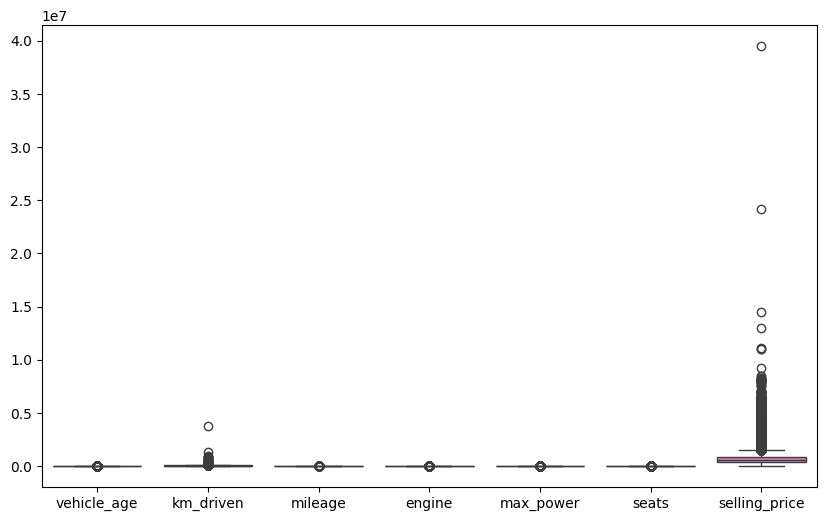

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(data = dataset[dataset.select_dtypes(include=['float64','int64']).columns])
plt.show()

In [17]:
q1 = dataset["selling_price"].quantile(0.25)
q3 = dataset["selling_price"].quantile(0.75)

IQR = q3 - q1

min_range = q1 - (IQR * 1.5)
max_range = q3 + (IQR * 1.5)

dataset = dataset[dataset["selling_price"] <= max_range]

In [18]:
dataset.shape

(13873, 12)

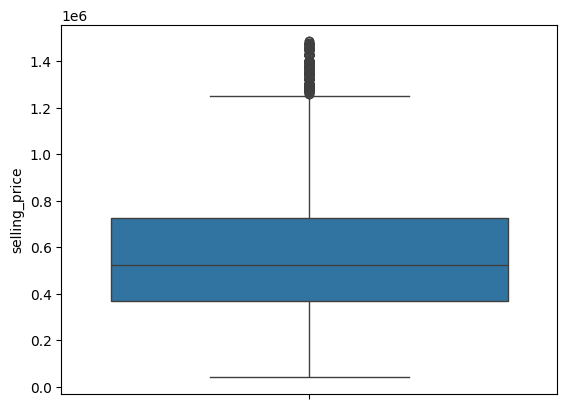

In [19]:
sns.boxplot(data = dataset["selling_price"])
plt.show()

# Exploratory Data Analysis (EDA)

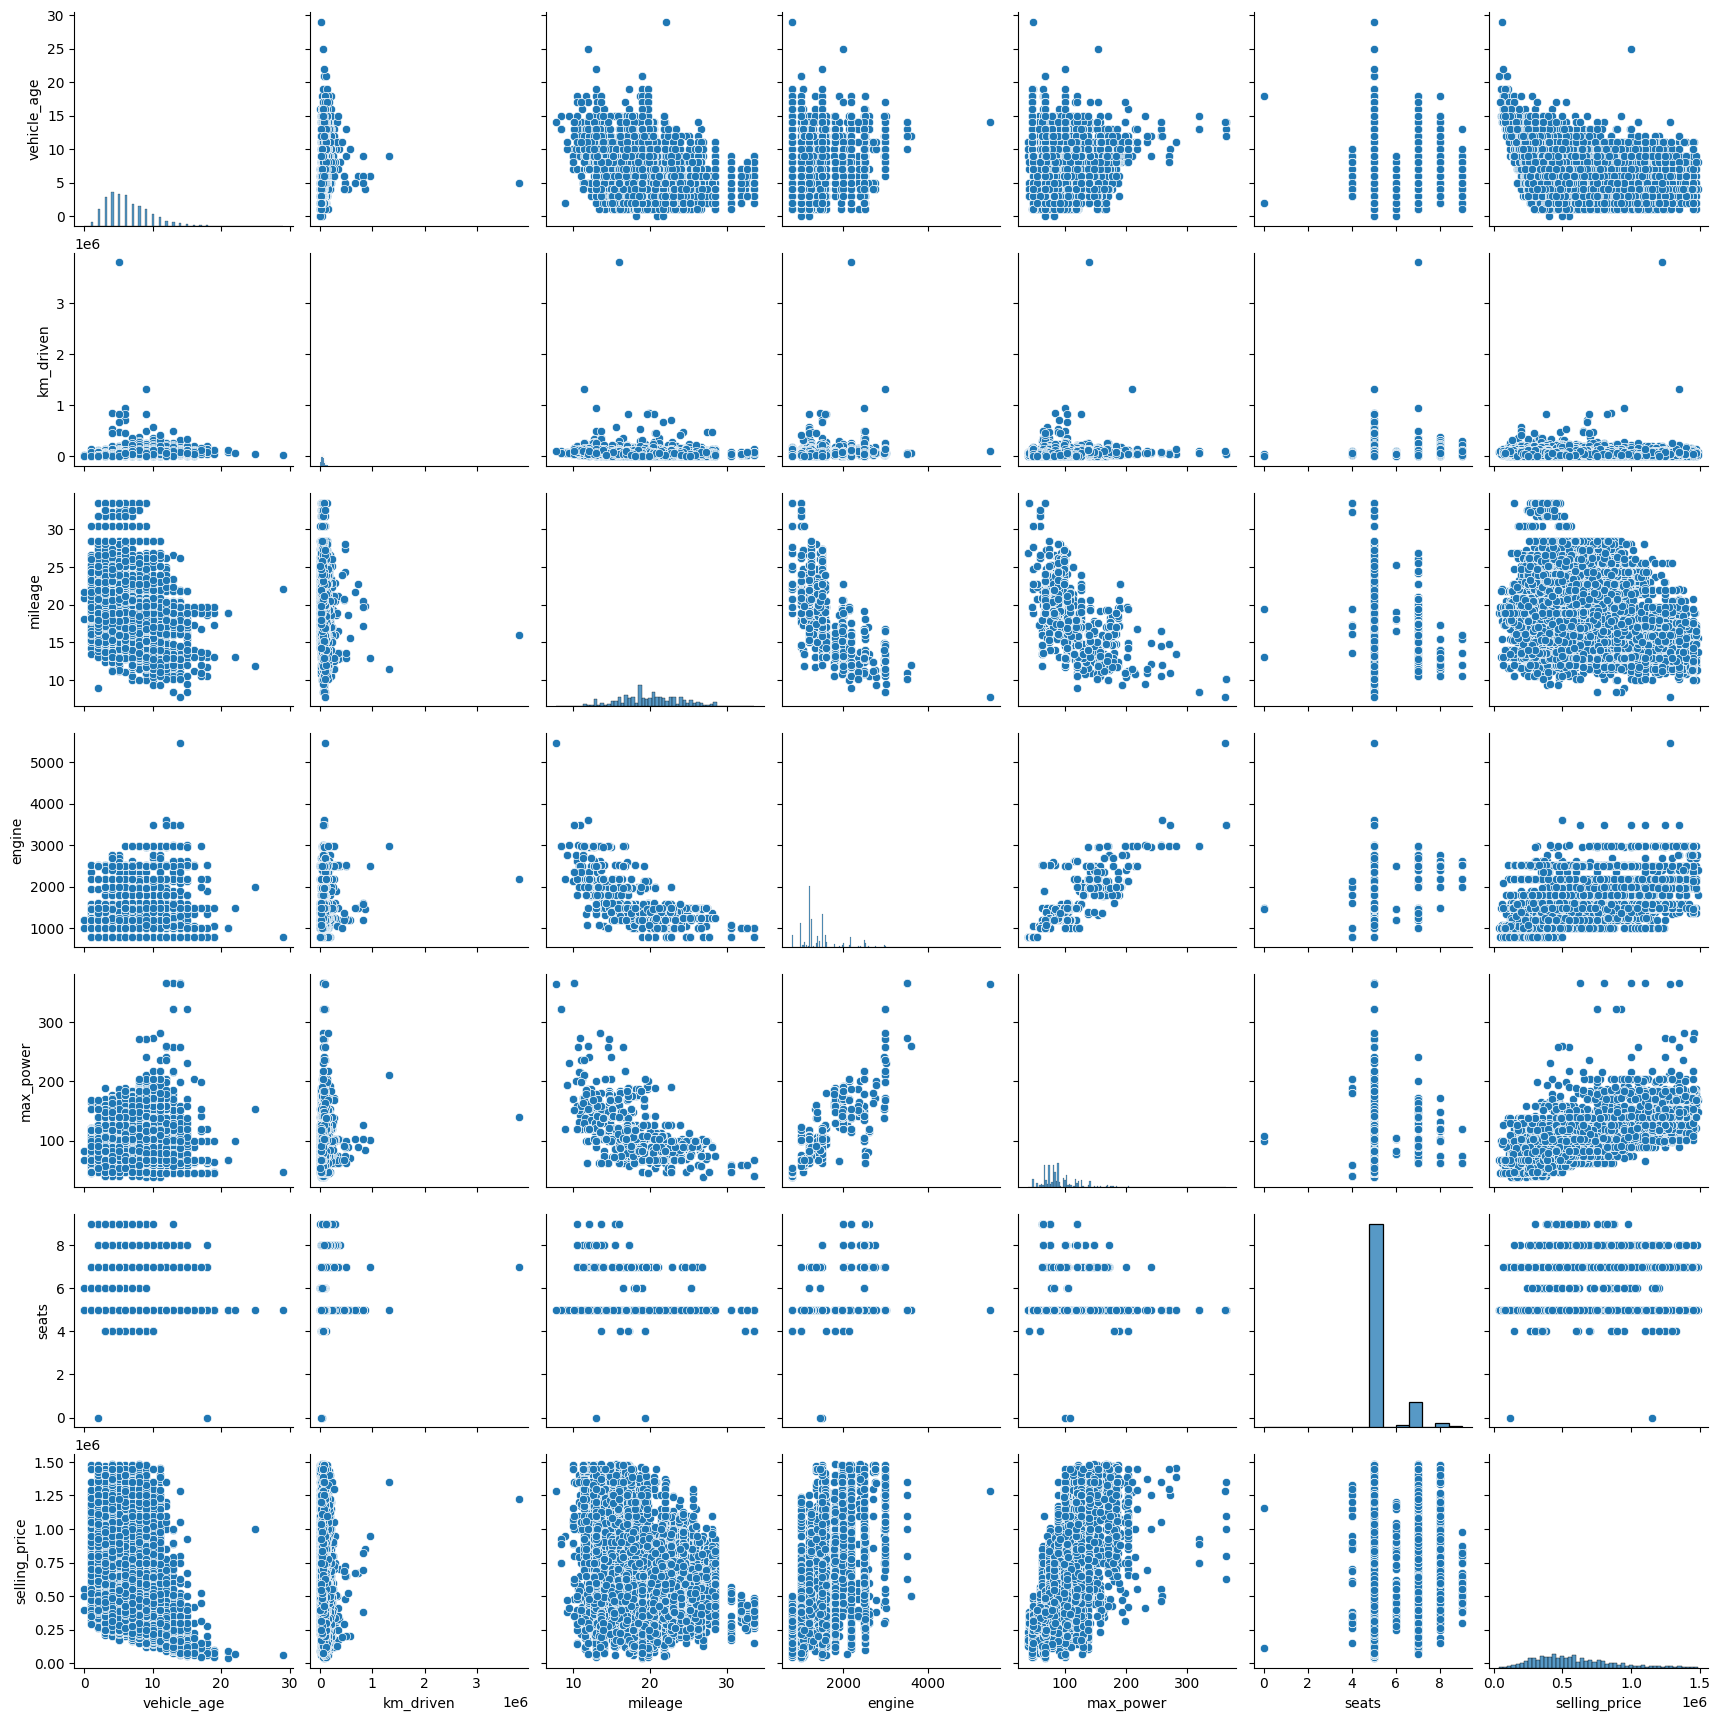

In [20]:
sns.pairplot(data=dataset)
plt.show()

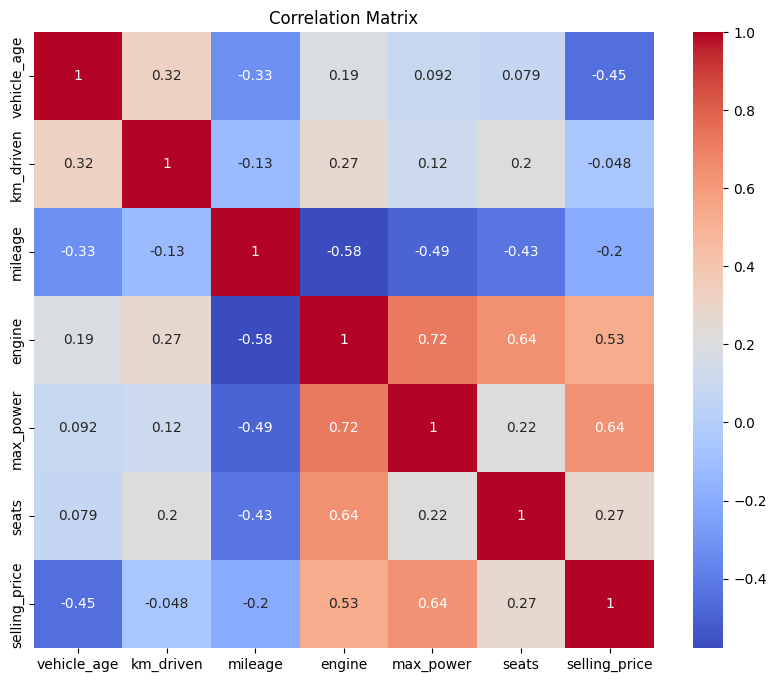

In [21]:
# Correlation matrix
corr = dataset[dataset.select_dtypes(include=['int64','float64']).columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


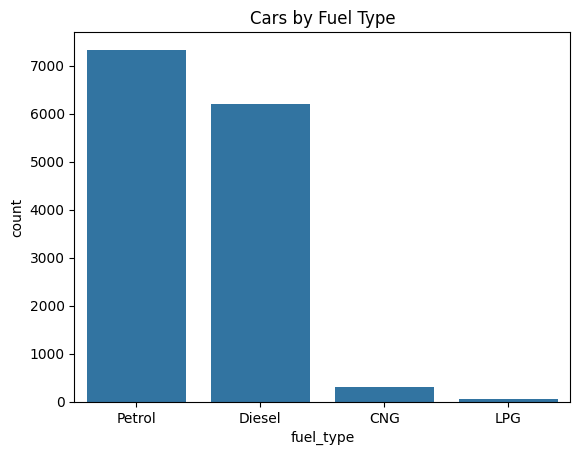

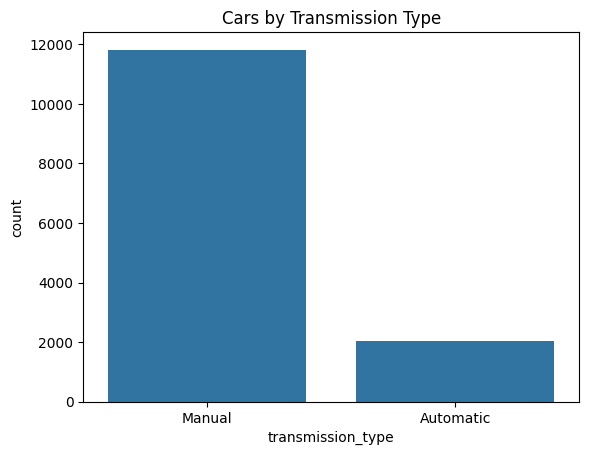

In [22]:
# Count of cars by Fuel Type
sns.countplot(x='fuel_type', data=dataset)
plt.title("Cars by Fuel Type")
plt.show()

# Count by Transmission
sns.countplot(x='transmission_type', data=dataset)
plt.title("Cars by Transmission Type")
plt.show()

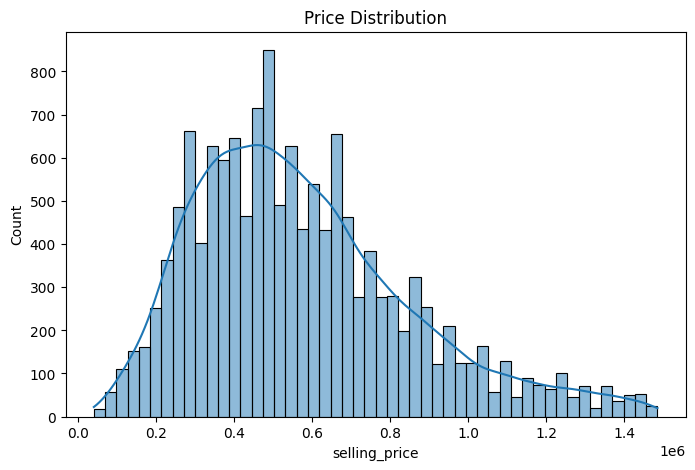

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(dataset['selling_price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

In [24]:
counts = dataset["model"].value_counts()
rare_models = counts[counts == 1].index
print(rare_models)

counts2 = dataset["brand"].value_counts()
rare_models2 = counts2[counts2 == 1].index
print(rare_models2)

Index(['Q7', 'XC', 'X5', 'Aura', 'XC60', 'CR', 'Altroz', 'Gurkha'], dtype='object', name='model')
Index(['Force'], dtype='object', name='brand')


In [25]:
columns = ['model','brand']
for col in columns:
        counts = dataset[col].value_counts()
        rare_values = counts[counts == 1].index
        print(rare_values)
        rows_to_duplicate = dataset[dataset[col].isin(rare_values)]
        print(rows_to_duplicate)
        # Add duplicates to original dataframe
        dataset = pd.concat([dataset, rows_to_duplicate], ignore_index=True)

Index(['Q7', 'XC', 'X5', 'Aura', 'XC60', 'CR', 'Altroz', 'Gurkha'], dtype='object', name='model')
         brand   model  vehicle_age  km_driven seller_type fuel_type  \
940    Hyundai    Aura            1       4500  Individual    Petrol   
1015     Volvo      XC           11      80000      Dealer    Diesel   
2418      Audi      Q7           12      67000  Individual    Diesel   
6075       BMW      X5           11      96714      Dealer    Diesel   
6262     Volvo    XC60            9     124000      Dealer    Diesel   
7495     Honda      CR            8      55000      Dealer    Petrol   
8149      Tata  Altroz            1       3800  Individual    Petrol   
13450    Force  Gurkha            5      60000  Individual    Diesel   

      transmission_type  mileage  engine  max_power  seats  selling_price  
940              Manual    20.50    1197      81.86      5         900000  
1015          Automatic    11.10    2400     200.00      7        1200000  
2418          Automatic  

In [26]:
# Train-Test Split

In [27]:
x = dataset.iloc[:,:-1]
y = dataset['selling_price']

In [28]:
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2 , random_state=42 , stratify=dataset[['model','brand']])

In [29]:
# Encoding Categorical Data

In [30]:
cat_columns = X_train.select_dtypes(include=['object']).columns
num_columns = X_train.select_dtypes(include=['int64','float64']).columns

In [31]:
ordinal_encoder =  OrdinalEncoder()
x_train_enc =  ordinal_encoder.fit_transform(X_train[cat_columns])
x_train_df = pd.DataFrame(x_train_enc,columns=cat_columns , index=X_train.index)

In [32]:
x_test_enc = ordinal_encoder.transform(X_test[cat_columns])
x_test_df = pd.DataFrame(x_test_enc , columns=cat_columns , index=X_test.index)

In [33]:
x_train = pd.concat([X_train.drop(cat_columns,axis=1),x_train_df],axis=1)
x_test = pd.concat([X_test.drop(cat_columns,axis=1),x_test_df], axis=1)

In [34]:
# Scaling Numeric Data

In [35]:
scaler = StandardScaler()
x_train[num_columns] = scaler.fit_transform(x_train[num_columns])
x_test[num_columns] = scaler.transform(x_test[num_columns])

# Model Selection

In [36]:
models = {

    "Linear Regression":LinearRegression(),
    "SVM":SVR(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "XGBoost":xgb.XGBRegressor(),
    "AdaBoost":AdaBoostRegressor(),
    "GradientBoost":GradientBoostingRegressor(),
}

In [37]:
for name , model in models.items():
    model.fit(x_train , Y_train)
    y_pred = model.predict(x_test)

    r2 = r2_score(Y_test , y_pred)    
    mse = mean_squared_error(Y_test , y_pred)    
    mae = mean_absolute_error(Y_test , y_pred)    
    rmse = root_mean_squared_error(Y_test , y_pred)

    print(f"{name}: R2 Score = {r2*100:.3f}")
    print(f"{name}: Mean Squared Error = {mse:.3f}")
    print(f"{name}: Mean Absolute Error = {mae:.3f}")
    print(f"{name}: Root Mean Squared Error = {rmse:.3f}")
    
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model , x_train , Y_train , cv=cv , scoring='r2')
    print(f"{name}: Average CV R2 = {np.mean(scores)*100:.3f}\n")

Linear Regression: R2 Score = 73.403
Linear Regression: Mean Squared Error = 21265348064.751
Linear Regression: Mean Absolute Error = 109526.032
Linear Regression: Root Mean Squared Error = 145826.431
Linear Regression: Average CV R2 = 73.118

SVM: R2 Score = -3.077
SVM: Mean Squared Error = 82413004980.524
SVM: Mean Absolute Error = 220632.449
SVM: Root Mean Squared Error = 287076.653
SVM: Average CV R2 = -3.006

KNN: R2 Score = 87.501
KNN: Mean Squared Error = 9993487403.898
KNN: Mean Absolute Error = 69209.444
KNN: Root Mean Squared Error = 99967.432
KNN: Average CV R2 = 86.961

Decision Tree: R2 Score = 80.366
Decision Tree: Mean Squared Error = 15697869616.893
Decision Tree: Mean Absolute Error = 84997.131
Decision Tree: Root Mean Squared Error = 125291.139
Decision Tree: Average CV R2 = 80.252

Random Forest: R2 Score = 88.099
Random Forest: Mean Squared Error = 9515438340.253
Random Forest: Mean Absolute Error = 68303.405
Random Forest: Root Mean Squared Error = 97547.108
Random

In [38]:
best_model = xgb.XGBRegressor()
best_model.fit(x_train , Y_train)
y_pred = best_model.predict(x_test)

# Model Evaluation

In [39]:
print("Training Score : ",round(best_model.score(x_train , Y_train)*100,3))
print("Testing Score : ",round(best_model.score(x_test , Y_test)*100,3))
print("R2 Score :",round(r2_score(Y_test , y_pred)*100,3))
print("Mean Squared Error :",round(mean_squared_error(Y_test , y_pred),3))
print("Mean Absolute Error :",round(mean_absolute_error(Y_test , y_pred),3))
print("Root Mean Squared Error :",round(root_mean_squared_error(Y_test , y_pred),3))

Training Score :  94.637
Testing Score :  89.54
R2 Score : 89.54
Mean Squared Error : 8362758656.0
Mean Absolute Error : 64848.023
Root Mean Squared Error : 91448.117


# Hyperparameter Tuning

In [40]:
param_grid = {
    'n_estimators': [i for i in range(50 , 500 , 50)],
    'max_depth': [j for j in range(3, 20 , 2)],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

In [41]:
# param_grid = {
#     'n_estimators': [100, 200, 500],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'subsample': [0.7, 0.8, 1.0],
#     'colsample_bytree': [0.7, 0.8, 1.0],
#     'gamma': [0, 0.1, 0.3]
# }


In [42]:
randomize = RandomizedSearchCV(estimator=best_model,
                              param_distributions=param_grid,
                              scoring='neg_mean_absolute_error')

In [43]:
# randomize.fit(x_train , Y_train)

In [44]:
# print("Best Parameters:", randomize.best_params_)
# -randomize.best_score_

# Final Model

In [45]:
final_model = xgb.XGBRegressor(subsample = 0.7, 
                               n_estimators = 200,
                               max_depth = 7,
                               learning_rate = 0.05,
                               gamma = 0.1,
                               colsample_bytree = 0.8)

In [46]:
final_model.fit(x_train , Y_train)
y_pred_final = final_model.predict(x_test)

In [47]:
print("Training Score : ",round(final_model.score(x_train , Y_train)*100,3))
print("Testing Score : ",round(final_model.score(x_test , Y_test)*100,3))
print("R2 Score :",round(r2_score(Y_test , y_pred_final)*100,3))
print("Mean Squared Error :",round(mean_squared_error(Y_test , y_pred_final),3))
print("Mean Absolute Error :",round(mean_absolute_error(Y_test , y_pred_final),3))
print("Root Mean Squared Error :",round(root_mean_squared_error(Y_test , y_pred_final),3))

Training Score :  93.743
Testing Score :  89.841
R2 Score : 89.841
Mean Squared Error : 8122752512.0
Mean Absolute Error : 63761.367
Root Mean Squared Error : 90126.312


In [48]:
# visualizating final Model

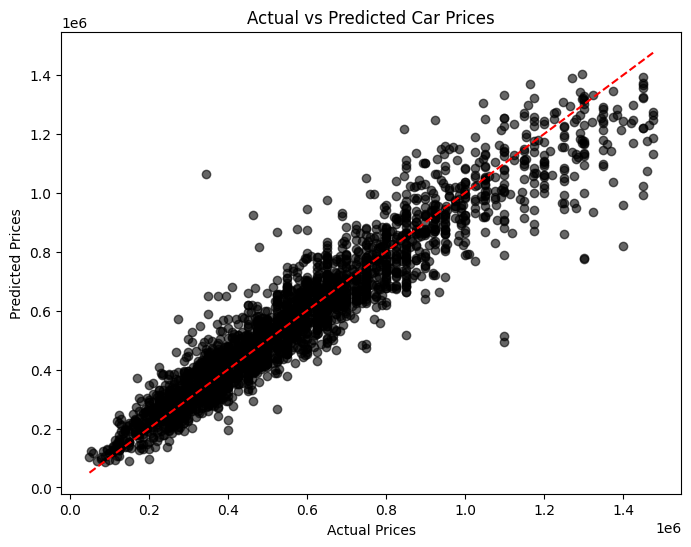

In [49]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_pred_final, alpha=0.6, color="black")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Car Prices")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # 45-degree line
plt.show()

In [50]:
# Saving Model ans Encoder

In [51]:
joblib.dump(final_model , 'car_price_model.pkl')
joblib.dump(ordinal_encoder , 'car_price_prd_encoder.pkl')
joblib.dump(scaler , 'car_price_prd_scaler.pkl')

['car_price_prd_scaler.pkl']

In [52]:
# input_data = [['Skoda','Octavia',6,115000,'Dealer','Diesel','Automatic',19.30,1968,141.00,5]]
# input_df = pd.DataFrame(input_data , columns=X_test.columns)

# cat_colum = input_df.select_dtypes(include=['object']).columns
# numeric_col = input_df.select_dtypes(include=['int64','float64']).columns

# enc = ordinal_encoder.transform(input_df[cat_colum])
# enc_df = pd.DataFrame(enc , columns=cat_colum)

# final_input = pd.concat([input_df.drop(columns=cat_colum,axis=1),enc_df],axis=1)+
# final_input[numeric_col] = scaler.transform(final_input[numeric_col])
# final_input

In [53]:
final_model.predict(final_input)[0]

NameError: name 'final_input' is not defined